homework 3
---

# Part 1

## permutation test function

(takes in 3rd argument as optional)

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def perm_test(arr_1,arr_2,n_repetitions=2000):
    """
    Permutation test.

    Parameters
    ----------
    arr_1 : array_like
        1st 1-dimensional array
    arr_2 : array_like
        2nd 1-dimensional array
    n_repetitions : int, optional
        Number of repetitions, by default 2000

    Returns
    -------
    p_val
        p-value of the permutation test
    """
    res = list()
    
    mean_diff = arr_1.mean() - arr_2.mean()
    
    for i in range(n_repetitions):
        arr_comb = np.concatenate((arr_1,arr_2))
        arr_perm = np.random.permutation(arr_comb) 
        arr_split_1 = arr_perm[0:int(len(arr_comb)/2)]
        arr_split_2 = arr_perm[int(len(arr_comb)/2):]
        mean_delta_perm = arr_split_1.mean() - arr_split_2.mean()
        res.append(mean_delta_perm)    

    p_val = np.sum(np.abs(res > np.abs(mean_diff))) / n_repetitions

    return p_val

## new data

In [65]:
X1 = np.array([200.48703626, 420.71413104, 482.04432447, 380.46896668,
       420.56864234, 474.09130417, 414.9748433 , 450.15423802,
       436.53977461, 500.12705411, 405.00705696, 419.3141794 ,
       460.46096974, 450.54358948, 420.93431563, 467.40481135,
       510.84094939, 482.61924772, 480.32638462,860.56161])

X2 = np.array([420.1243685 , 501.25211241, 454.37132587, 900.39850065,
       501.79657108, 481.94197109, 469.51703441, 449.82747137,
       450.98838458, 477.15878941, 570.00039675, 460.18766471,
       432.70480616, 480.38394358, 478.46070285, 485.71067427,
       487.91937261, 505.86604195, 495.8480102 , 1500.5446 ])

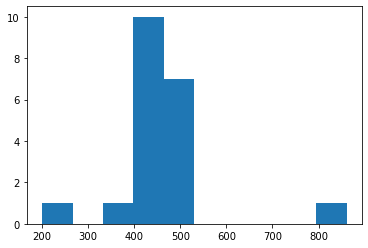

In [66]:
plt.hist(X1);

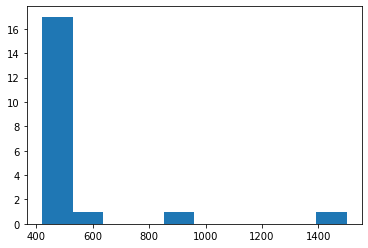

In [67]:
plt.hist(X2);

## *t*-test and permutation test on new data

In [72]:
from scipy.stats import ttest_ind

mean_diff = X1.mean() - X2.mean()
_,p_val_ttest = ttest_ind(X1,X2)
p_val_perm = perm_test(X1,X2)
print("Mean difference X1-X2:   ",round(mean_diff,3))
print("Permutation test p-value:  ",round(p_val_perm,3))
print("t-Test p-value:            ",round(p_val_ttest,3))

Mean difference X1-X2:    -93.341
Permutation test p-value:   0.058
t-Test p-value:             0.131


## log-transform data

In [69]:
X1_log = np.log10(X1)
X2_log = np.log10(X2)

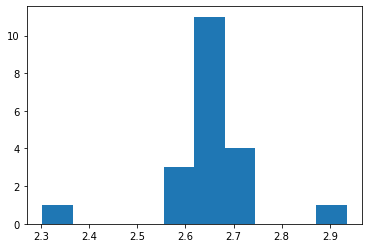

In [75]:
plt.hist(X1_log);

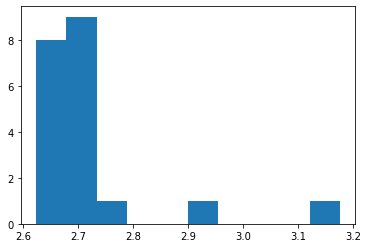

In [74]:
plt.hist(X2_log);

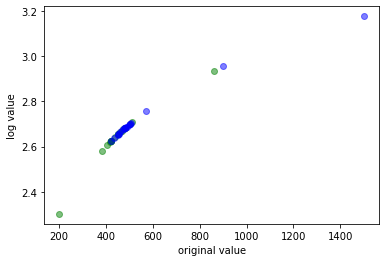

In [90]:
fig,ax = plt.subplots()

ax.scatter(X1,X1_log,color="green",alpha=0.5)
ax.scatter(X2,X2_log,color="blue", alpha=0.5)
ax.set_xlabel("original value")
ax.set_ylabel("log value")
plt.show()

In [91]:
mean_diff_log = X1_log.mean() - X2_log.mean()
_,p_val_ttest_log = ttest_ind(X1_log,X2_log)
p_val_perm_log = perm_test(X1_log,X2_log)
print("Mean difference X1-X2 (log):    ",round(mean_diff_log,3))
print("Permutation test p-value (log):  ",round(p_val_perm_log,3))
print("t-Test p-value (log):            ",round(p_val_ttest_log,3))

Mean difference X1-X2 (log):     -0.07
Permutation test p-value (log):   0.034
t-Test p-value (log):             0.07


## how permutation test p-value changes with the number of repetitions

(optional parameter for n repetitions already implemented in the first function)

### original data

In [105]:
n_start = 50
n_end = 3050

p_vals = list()

for n in range(n_start,n_end+1,200):
    p_vals.append((n,perm_test(X1,X2,n)))

p_vals

[(50, 0.04),
 (250, 0.08),
 (450, 0.07555555555555556),
 (650, 0.06153846153846154),
 (850, 0.0611764705882353),
 (1050, 0.06190476190476191),
 (1250, 0.0664),
 (1450, 0.06),
 (1650, 0.07757575757575758),
 (1850, 0.06324324324324325),
 (2050, 0.0575609756097561),
 (2250, 0.06444444444444444),
 (2450, 0.06571428571428571),
 (2650, 0.05622641509433962),
 (2850, 0.05543859649122807),
 (3050, 0.06)]

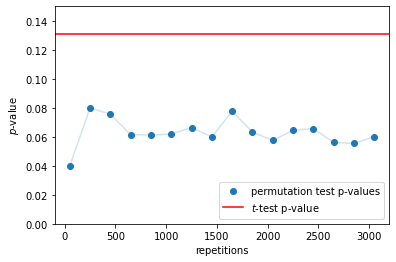

In [270]:
fig,ax = plt.subplots()

x,y = np.array(p_vals).T
ax.scatter(x,y, label="permutation test p-values")
ax.plot(x,y,alpha=0.2)
ax.axhline(p_val_ttest,color="red",label="$t$-test p-value")
ax.set_xlabel("repetitions")
ax.set_ylabel("$p$-value")
ax.set_ylim(0,0.15)
ax.legend(loc='lower right');

### same for log data

In [106]:
p_vals_log = list()

for n in range(n_start,n_end+1,200):
    p_vals_log.append((n,perm_test(X1_log,X2_log,n)))

p_vals_log

[(50, 0.02),
 (250, 0.028),
 (450, 0.02666666666666667),
 (650, 0.021538461538461538),
 (850, 0.03058823529411765),
 (1050, 0.02761904761904762),
 (1250, 0.0296),
 (1450, 0.04689655172413793),
 (1650, 0.04242424242424243),
 (1850, 0.028648648648648647),
 (2050, 0.03463414634146342),
 (2250, 0.03911111111111111),
 (2450, 0.04285714285714286),
 (2650, 0.03811320754716981),
 (2850, 0.036491228070175435),
 (3050, 0.0380327868852459)]

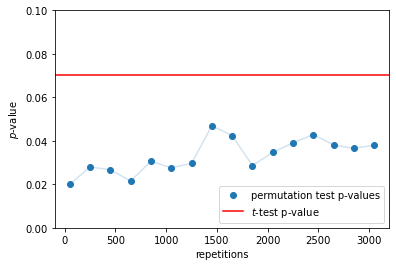

In [269]:
fig,ax = plt.subplots()

x_log,y_log = np.array(p_vals_log).T
ax.scatter(x_log,y_log,label="permutation test p-values")
ax.plot(x_log,y_log,alpha=0.2)
ax.axhline(p_val_ttest_log,color="red",label="$t$-test p-value")
ax.set_xlabel("repetitions")
ax.set_ylabel("$p$-value")
ax.set_ylim(0,0.1)
ax.legend(loc='lower right');

## Bootstrapped confidence intervals

In [228]:
n_bootstraps = 2000
sample_size = 20

np.random.seed(0)

def bootstrap(arr, sample_size, n_bootstraps, replace=True):
    
    means = list()
    for i in range(n_bootstraps):
        mean_i = np.random.choice(arr, sample_size, replace=replace).mean()
        means.append(mean_i)
        
    return means

def confidence_intervals(arr,alpha=0.05):
    
    ci_lower = np.percentile(arr,100 * alpha / 2)
    ci_upper = np.percentile(arr,100 * 1 - (alpha / 2))
    
    return ci_lower,ci_upper

means_X1_bs = bootstrap(X1,20,2000)
means_X2_bs = bootstrap(X2,20,2000)

In [243]:
ci_95_X1 = confidence_intervals(means_X1_bs,0.05)
ci_95_X1

(413.215404425925, 564.1940906317104)

In [244]:
ci_99_X1 = confidence_intervals(means_X1_bs,0.01)
ci_99_X1

(399.30391283559754, 569.2301488831421)

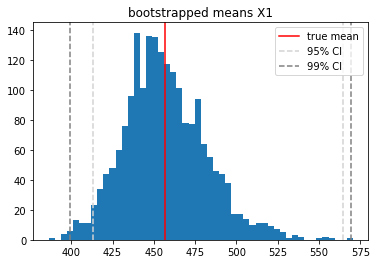

In [268]:
fig,ax = plt.subplots()

ax.hist(means_X1_bs,bins=50)
ax.axvline(X1.mean(), color="red",label="true mean")
ax.axvline(ci_95_X1[0], color="lightgrey",ls="--",label="95% CI")
ax.axvline(ci_95_X1[1], color="lightgrey",ls="--")
ax.axvline(ci_99_X1[0], color="grey",ls="--",label="99% CI")
ax.axvline(ci_99_X1[1], color="grey",ls="--")
ax.set_title("bootstrapped means X1")
ax.legend(loc="upper right");

In [245]:
ci_95_X2 =confidence_intervals(means_X2_bs,0.05)
ci_95_X2

(472.43360128455004, 735.5884955049833)

In [246]:
ci_99_X2 =confidence_intervals(means_X2_bs,0.01)
ci_99_X2

(466.67603997030005, 737.4912364333966)

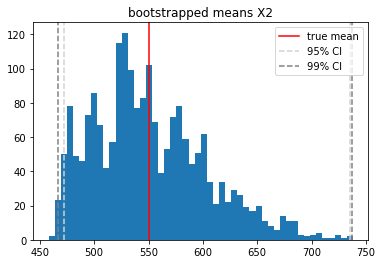

In [267]:
fig,ax = plt.subplots()

ax.hist(means_X2_bs,bins=50);
ax.axvline(X2.mean(), color="red",label="true mean")
ax.axvline(ci_95_X2[0], color="lightgrey",ls="--",label="95% CI")
ax.axvline(ci_95_X2[1], color="lightgrey",ls="--")
ax.axvline(ci_99_X2[0], color="grey",ls="--",label="99% CI")
ax.axvline(ci_99_X2[1], color="grey",ls="--")
ax.set_title("bootstrapped means X2")
ax.legend(loc="upper right");

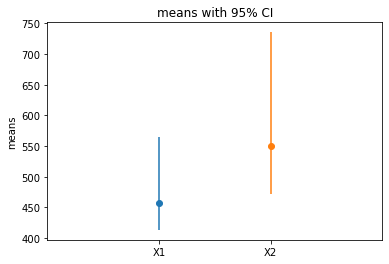

In [352]:
fig,ax = plt.subplots()

ax.errorbar(0, X1.mean(), yerr=[X1.mean() - [ci_95_X1[0]],[ci_95_X1[1] - X1.mean()]], fmt='-o', label='X1')
ax.errorbar(1, X2.mean(), yerr=[X2.mean() - [ci_95_X2[0]],[ci_95_X2[1] - X2.mean()]], fmt='-o', label='X2')
ax.set_ylabel('means')
ax.set_xlim([-1,2])
ax.set_xticks(np.arange(2),['X1','X2'])
ax.set_title("means with 95% CI");

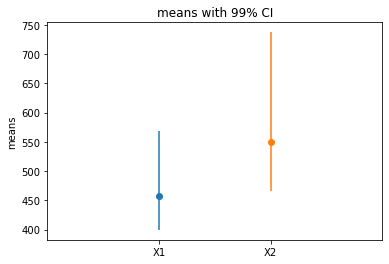

In [351]:
fig,ax = plt.subplots()

ax.errorbar(0, X1.mean(), yerr=[X1.mean() - [ci_99_X1[0]],[ci_99_X1[1] - X1.mean()]], fmt='-o', label='X1')
ax.errorbar(1, X2.mean(), yerr=[X2.mean() - [ci_99_X2[0]],[ci_99_X2[1] - X2.mean()]], fmt='-o', label='X2')
ax.set_ylabel('means')
ax.set_xlim([-1,2])
ax.set_xticks(np.arange(2),['X1','X2'])
ax.set_title("means with 99% CI");

# Part 2

## data simulation and analysis

### compute only for once

In [374]:
patient = np.random.normal(loc=600,scale=100,size=5)
control = np.random.normal(loc=550,scale=100,size=50)

In [379]:
_,p_val_ttest = ttest_ind(patient,control)
p_val_ttest

0.3180769765588719

In [380]:
p_val_perm = perm_test(patient,control)
p_val_perm

0.0365

### compute n times

In [405]:
n_iter = 200

res = list()

for i in range(0,n_iter):
    patient = np.random.normal(loc=600,scale=100,size=5)
    control = np.random.normal(loc=550,scale=100,size=50)
    _,p_val_ttest = ttest_ind(patient,control)
    p_val_perm = perm_test(patient,control)
    res.append((p_val_ttest,p_val_perm))

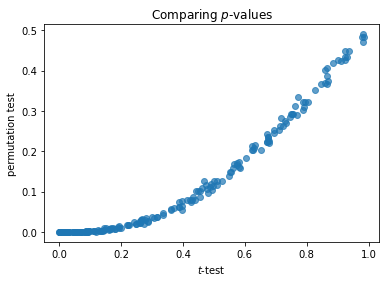

In [409]:
fig,ax = plt.subplots()

ttest,permtest = np.array(res).T
ax.scatter(ttest,permtest,alpha=0.7)
ax.set_title("Comparing $p$-values")
ax.set_ylabel("permutation test")
ax.set_xlabel("$t$-test");

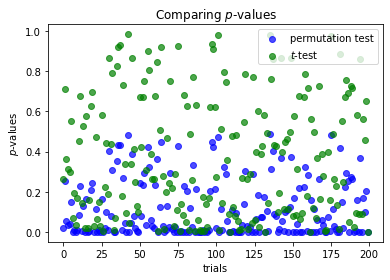

In [419]:
fig,ax = plt.subplots()

ttest,permtest = np.array(res).T
x = range(0,n_iter)
ax.scatter(x,permtest,alpha=0.7,color="blue",label="permutation test")
ax.scatter(x,ttest,alpha=0.7,color="green",label="$t$-test")
ax.set_title("Comparing $p$-values")
ax.set_ylabel("$p$-values")
ax.set_xlabel("trials")
ax.legend();

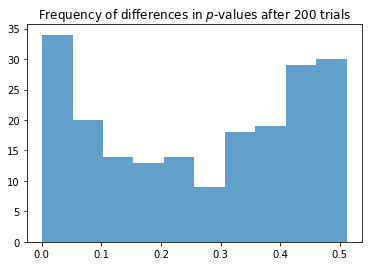

In [427]:
fig,ax = plt.subplots()

ttest,permtest = np.array(res).T
ax.hist(ttest-permtest,alpha=0.7)
ax.set_title(f"Frequency of differences in $p$-values after {n_iter} trials");

**So the question would be here, what does this tell us?**